In [1]:
#Importing the Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('data.csv')

In [3]:
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.drop('id',axis=1,inplace=True)
df.drop('Unnamed: 32',axis=1,inplace=True)

In [6]:
df.shape

(569, 31)

In [7]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [8]:
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
#Checking out statistics (mean, median standard deviation)
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


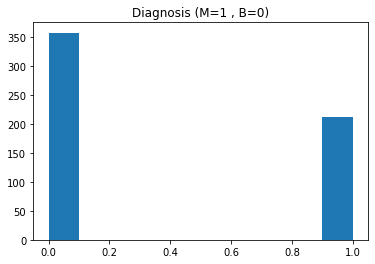

In [11]:
df.describe()
plt.hist(df['diagnosis'])
plt.title('Diagnosis (M=1 , B=0)')
plt.show()

In [12]:
features_mean=list(df.columns[1:11])

# split dataframe into two based on diagnosis
dfM=df[df['diagnosis'] ==1]
dfB=df[df['diagnosis'] ==0]

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

def getNormalizedData(X):
   
    # fit scaler on training data
    norm = MinMaxScaler().fit(X)

    # transform training data
    X_train_norm = norm.transform(X)
    X_train_norm = pd.DataFrame(X_train_norm, columns=X.columns.values)

    return X_train_norm

In [17]:
#'Diagnosis' is the target variable, change as applicable
y = df.diagnosis
X = df.drop('diagnosis',1)

X = getNormalizedData(X)

In [18]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=42, test_size = 0.2)

In [19]:
def get_nn_simplemodel(n_inputs=22, n_outputs=1, optimizerinput='adam'):
    # create model
    model = Sequential()
    
    model.add(layers.Dense(n_inputs, input_dim=n_inputs, kernel_initializer='normal', activation='relu'))
    
    model.add(layers.Dense(2000, activation='relu'))
    
    model.add(layers.Dense(1))
    
    model.compile(loss='mean_squared_error', optimizer=optimizerinput)
    return model

In [20]:
from keras.wrappers.scikit_learn import KerasRegressor
from keras.models import Sequential
from tensorflow.keras import layers

#Hyperparameter Tuning to Tune Batch Size and Number of Epochs

from sklearn.model_selection import GridSearchCV
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

# create model
model = KerasRegressor(build_fn=get_nn_simplemodel, n_inputs=len(X.columns), n_outputs=1, verbose=1)
#model = KerasClassifier(build_fn=create_model, verbose=0)

# define the grid search parameters
batch_size = [5, 10, 20, 30, 40]
epochs = [10, 50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, y)
# summarize results

print(grid_result)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    
    

Epoch 1/50
114/114 [==============================] - 0s 1ms/step - loss: 0.1086
Epoch 2/50
114/114 [==============================] - 0s 1ms/step - loss: 0.0745
Epoch 3/50
114/114 [==============================] - 0s 1ms/step - loss: 0.0578
Epoch 4/50
114/114 [==============================] - 0s 1ms/step - loss: 0.0411
Epoch 5/50
114/114 [==============================] - 0s 1ms/step - loss: 0.0363
Epoch 6/50
114/114 [==============================] - 0s 1ms/step - loss: 0.0319
Epoch 7/50
114/114 [==============================] - 0s 1ms/step - loss: 0.0299
Epoch 8/50
114/114 [==============================] - 0s 1ms/step - loss: 0.0246
Epoch 9/50
114/114 [==============================] - 0s 1ms/step - loss: 0.0241
Epoch 10/50
114/114 [==============================] - 0s 1ms/step - loss: 0.0306
Epoch 11/50
114/114 [==============================] - 0s 1ms/step - loss: 0.0214
Epoch 12/50
114/114 [==============================] - 0s 1ms/step - loss: 0.0192
Epoch 13/50
114/114 [====

In [21]:
#Hyperparameter Tuning to Tune Optimization Algorithm

from sklearn.model_selection import GridSearchCV

# create model
model = KerasRegressor(build_fn=get_nn_simplemodel, n_inputs=len(X.columns), epochs=200, batch_size=5, n_outputs=1, verbose=1)

# define the grid search parameters
optimizer = ['RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizerinput=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
  
    

Epoch 1/200
114/114 [==============================] - 0s 1ms/step - loss: 0.1094
Epoch 2/200
114/114 [==============================] - 0s 851us/step - loss: 0.0699
Epoch 3/200
114/114 [==============================] - 0s 817us/step - loss: 0.0646
Epoch 4/200
114/114 [==============================] - 0s 839us/step - loss: 0.0584
Epoch 5/200
114/114 [==============================] - 0s 923us/step - loss: 0.0547
Epoch 6/200
114/114 [==============================] - 0s 818us/step - loss: 0.0499
Epoch 7/200
114/114 [==============================] - 0s 819us/step - loss: 0.0458
Epoch 8/200
114/114 [==============================] - 0s 1ms/step - loss: 0.0427
Epoch 9/200
114/114 [==============================] - 0s 821us/step - loss: 0.0402
Epoch 10/200
114/114 [==============================] - 0s 943us/step - loss: 0.0377
Epoch 11/200
114/114 [==============================] - 0s 1ms/step - loss: 0.0366
Epoch 12/200
114/114 [==============================] - 0s 812us/step - loss: 0.

114/114 [==============================] - 0s 805us/step - loss: 0.0087
Epoch 98/200
114/114 [==============================] - 0s 791us/step - loss: 0.0076
Epoch 99/200
114/114 [==============================] - 0s 830us/step - loss: 0.0091
Epoch 100/200
114/114 [==============================] - 0s 825us/step - loss: 0.0075
Epoch 101/200
114/114 [==============================] - 0s 815us/step - loss: 0.0099
Epoch 102/200
114/114 [==============================] - 0s 827us/step - loss: 0.0090
Epoch 103/200
114/114 [==============================] - 0s 799us/step - loss: 0.0077
Epoch 104/200
114/114 [==============================] - 0s 830us/step - loss: 0.0076
Epoch 105/200
114/114 [==============================] - 0s 787us/step - loss: 0.0075
Epoch 106/200
114/114 [==============================] - 0s 787us/step - loss: 0.0073
Epoch 107/200
114/114 [==============================] - 0s 981us/step - loss: 0.0073
Epoch 108/200
114/114 [==============================] - 0s 825us/step

114/114 [==============================] - 0s 810us/step - loss: 0.0045
Epoch 193/200
114/114 [==============================] - 0s 866us/step - loss: 0.0041
Epoch 194/200
114/114 [==============================] - 0s 878us/step - loss: 0.0040
Epoch 195/200
114/114 [==============================] - 0s 947us/step - loss: 0.0034
Epoch 196/200
114/114 [==============================] - 0s 814us/step - loss: 0.0051
Epoch 197/200
114/114 [==============================] - 0s 786us/step - loss: 0.0034
Epoch 198/200
114/114 [==============================] - 0s 813us/step - loss: 0.0035
Epoch 199/200
114/114 [==============================] - 0s 863us/step - loss: 0.0046
Epoch 200/200
114/114 [==============================] - 0s 834us/step - loss: 0.0035
Best: -0.023221 using {'optimizerinput': 'Adamax'}
-0.034766 (0.008045) with: {'optimizerinput': 'RMSprop'}
-0.062387 (0.018451) with: {'optimizerinput': 'Adagrad'}
-0.130494 (0.025806) with: {'optimizerinput': 'Adadelta'}
-0.029354 (0.0128

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

#Get error using cross validation

# evaluate model
estimator = KerasRegressor(build_fn=get_nn_simplemodel, n_inputs=len(X.columns), n_outputs=1, epochs=100, batch_size=10, optimizerinput = 'Adam', verbose=0)

kfold = KFold(n_splits=5)
results = cross_val_score(estimator, X, y, cv=kfold)
print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Baseline: -0.03 (0.01) MSE


In [23]:
model=get_nn_simplemodel(len(X.columns),1, optimizerinput = 'Adam');
history = model.fit(train_X, train_y, verbose=1, epochs=100, batch_size=10, validation_data=(val_X, val_y))

Epoch 1/100
46/46 [==============================] - 0s 4ms/step - loss: 0.1442 - val_loss: 0.0814
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.0737 - val_loss: 0.0637
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.0630 - val_loss: 0.0541
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.0564 - val_loss: 0.0614
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.0589 - val_loss: 0.0461
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.0447 - val_loss: 0.0422
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.0429 - val_loss: 0.0405
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.0350 - val_loss: 0.0430
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.0354 - val_loss: 0.0441
Epoch 10/100
46/46 [==============================] - 0s 2ms/step - loss: 0.0349 - val_loss: 0.0304
Epoch 11/

Epoch 83/100
46/46 [==============================] - 0s 2ms/step - loss: 0.0076 - val_loss: 0.0310
Epoch 84/100
46/46 [==============================] - 0s 2ms/step - loss: 0.0058 - val_loss: 0.0394
Epoch 85/100
46/46 [==============================] - 0s 2ms/step - loss: 0.0063 - val_loss: 0.0350
Epoch 86/100
46/46 [==============================] - 0s 2ms/step - loss: 0.0062 - val_loss: 0.0347
Epoch 87/100
46/46 [==============================] - 0s 1ms/step - loss: 0.0041 - val_loss: 0.0298
Epoch 88/100
46/46 [==============================] - 0s 2ms/step - loss: 0.0056 - val_loss: 0.0265
Epoch 89/100
46/46 [==============================] - 0s 2ms/step - loss: 0.0054 - val_loss: 0.0390
Epoch 90/100
46/46 [==============================] - 0s 2ms/step - loss: 0.0056 - val_loss: 0.0287
Epoch 91/100
46/46 [==============================] - 0s 2ms/step - loss: 0.0062 - val_loss: 0.0303
Epoch 92/100
46/46 [==============================] - 0s 2ms/step - loss: 0.0063 - val_loss: 0.0345


   loss_train  loss_val  diff_in_loss
0    0.144155  0.081368      0.062787
1    0.073730  0.063680      0.010050
2    0.063003  0.054149      0.008854
3    0.056380  0.061395      0.005015
4    0.058851  0.046058      0.012793
5    0.044713  0.042212      0.002500
6    0.042888  0.040501      0.002387
7    0.035001  0.042954      0.007954
8    0.035377  0.044071      0.008694
9    0.034865  0.030361      0.004504


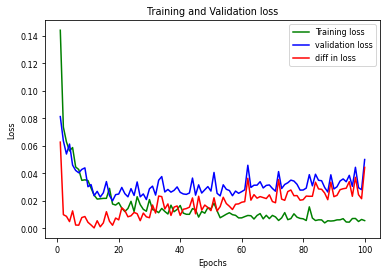

In [24]:
from datetime import datetime

# Code to create graph for train vs validation error for different epochs

loss_train = history.history['loss']
loss_val = history.history['val_loss']

diff_in_loss=abs(np.subtract(loss_val,loss_train));

df = pd.DataFrame({'loss_train':loss_train, 'loss_val':loss_val, 'diff_in_loss':diff_in_loss})

print(df.head(10))

epochs = range(1,len(loss_train)+1)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.plot(epochs, diff_in_loss, 'r', label='diff in loss')

plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

timeStr=datetime.now().strftime("%Y%m%d-%H%M%S");
fileName = 'train_vs_Validation_loss_'+timeStr

plt.savefig(fileName+'.png',format='png', dpi=2000)

df.to_excel("neural_network_train_vs_val_loss"+timeStr+".xlsx", sheet_name='TrainvsValLoss')

plt.show()

In [25]:
#code to print actual, predicted, diff in values

predicted=model.predict(val_X);
actual=val_y;


In [26]:
y_flat=actual.values.flatten();

predicted_flat=predicted.flatten()

residue=abs(np.subtract(y_flat,predicted_flat))

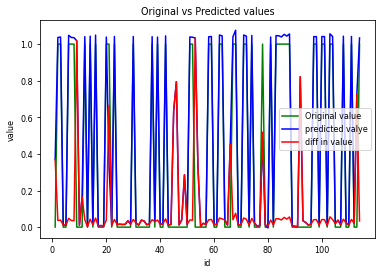

In [27]:
#Plot
xasix = range(1,len(y_flat)+1)

plt.plot(xasix, y_flat, 'g', label='Original value')
plt.plot(xasix, predicted_flat, 'b', label='predicted valye')
plt.plot(xasix, residue, 'r', label='diff in value')

plt.title('Original vs Predicted values')
plt.xlabel('id')
plt.ylabel('value')
plt.legend()

timeStr=datetime.now().strftime("%Y%m%d-%H%M%S");
fileName = 'Original_vs_Predicted_y'+timeStr

plt.savefig(fileName+'.png',format='png', dpi=2000)

plt.show()

#Write to file
df = pd.DataFrame({'y1':y_flat, 'pred':predicted_flat, 'residue':residue})

df.to_excel("neural_network_output"+timeStr+".xlsx", sheet_name='Sheet_name_1')

#Data frame to include all X,y, predicted y and difference between actual y and predicted y
masterdf = X.merge(df,left_index=True, right_index=True)
masterdf.to_excel("master_analysis_"+timeStr+".xlsx", sheet_name='Sheet_name_1')